## How likely is it for people in the same room to share the same birth date?

P(same) = 1 - P(no-overlap)

P(no overlap) = 365/365 * 364/365 * 363/365 etc 

In [110]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

**Create function to calculate the probability of overlap**

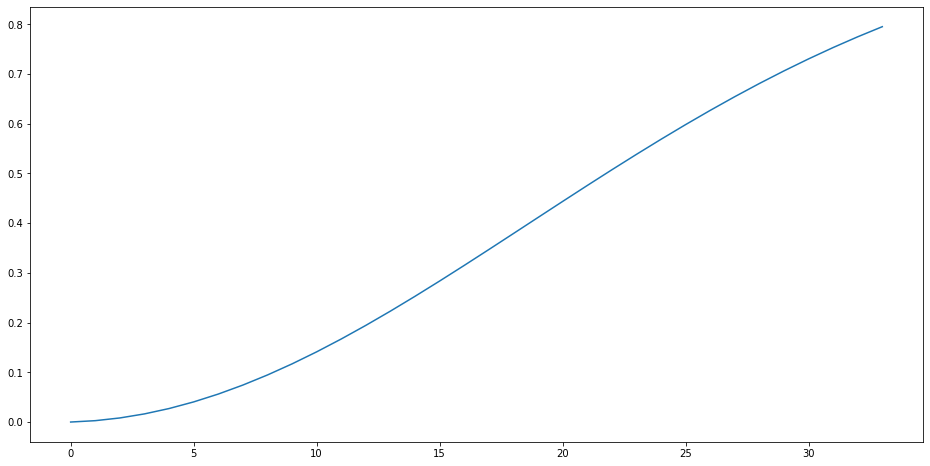

In [156]:
#Function to determine probability of being born on the same day
def prob_overlap(room = 20):
    return 1 - np.product((365 - np.arange(room)) / 365)

#Plot the probabilities when the room size increases
plt.figure(figsize=(16,8))
plt.plot([prob_overlap(r) for r in range(1, 35)]);

**Create function to simulate and then caculate the probability of overlap**

In [108]:
#Simulation function to create room with random birthdays and verify how ofter we have people sharing the same birth data
#1)Create empty array to keep track of results
#2)Run simulation and verify if the length of unique values equals the lenght of all random birthdays in the room
#3)Return the probability of being born on the same date together with the array that keeps track
def simulate_room(simulations=1000, room=20):
    
    track_array = np.empty((0,1), bool)
    
    for simul in range(simulations):
        track_array = np.append(track_array, 
                                len(np.unique(np.random.randint(1, 365, room))) == room
                               )
        
    probability = (simulations - np.sum(track_array)) / simulations
    
    return probability 

**Visualize calculation versus simulation**

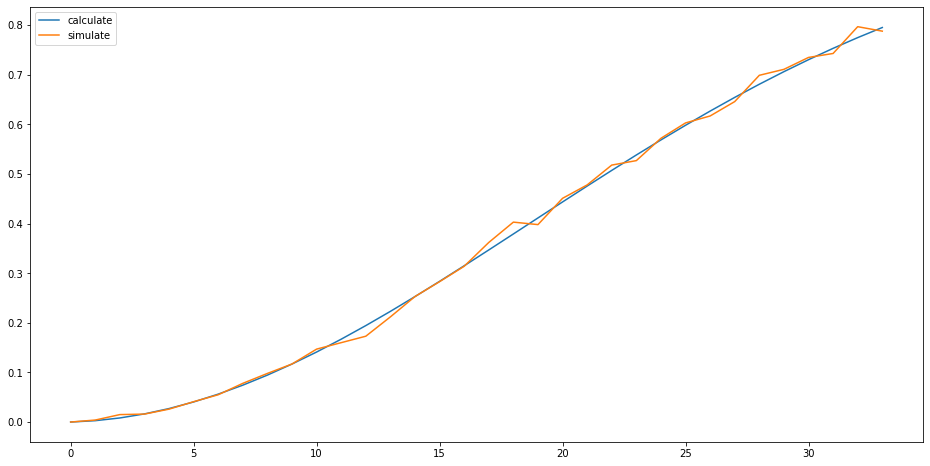

In [155]:
plt.figure(figsize=(16,8))
plt.plot([prob_overlap(room=r) for r in range(1, 35)], label='calculate');
plt.plot([simulate_room(room=r) for r in range(1, 35)], label='simulate');
plt.legend();

**Use dataset to validate**

In [112]:
#Set working directory
os.chdir('C:\\Users\\Casper Damen\\DiP\\Python klasje\\data')

In [113]:
df = pd.read_csv('birthdays.csv')

In [134]:
#Function to calculate the probability of being born on a specific date based on the dataset
def prob_born(dataf):
    
    prob_born_df =  (dataf
                     .assign(date = lambda d: pd.to_datetime(d['date']))
                     .assign(day_of_week = lambda d: d['date'].dt.dayofyear)
                     .groupby('day_of_week')
                     .agg(n_births = ('births', 'sum'))
                     .assign(prob = lambda d: d['n_births'] / np.sum(d['n_births']))
                    )
    
    return prob_born_df

In [140]:
#Create dataframe containing probabilities for the different days
birth_prob_df = df.pipe(prob_born)

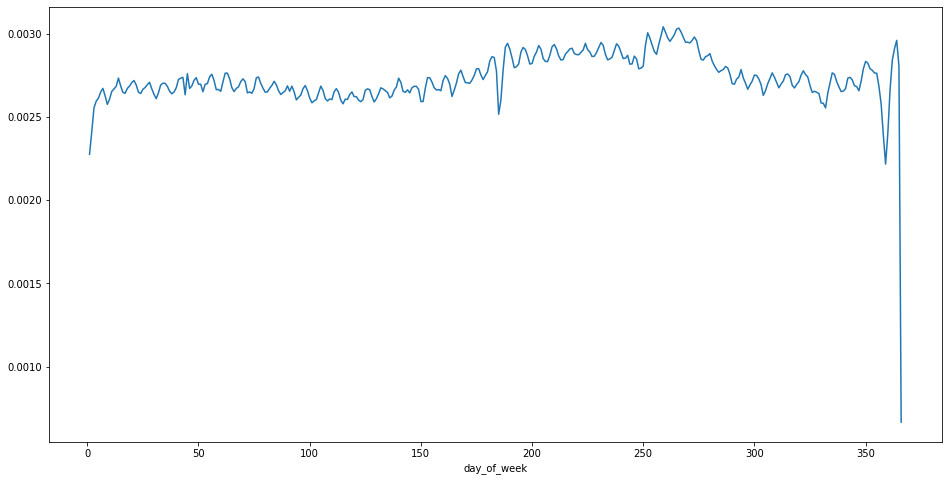

In [154]:
#Plot the probability to be born for the different days
plt.figure(figsize=(16,8))
birth_prob_df['prob'].plot()

In [144]:
#Simulation function to create room with random birthdays based on the USA birthday probability distribution
def simulate_room_true(dataf, simulations=1000, room=20):
    
    track_array = np.empty((0,1), bool)
    
    for simul in range(simulations):
        track_array = np.append(track_array, 
                                len(np.unique(np.random.choice(dataf.index, p=dataf['prob'], size=room))) == room
                               )
        
    probability = (simulations - np.sum(track_array)) / simulations
    
    return probability 

**Visualize calculation versus true simulation**

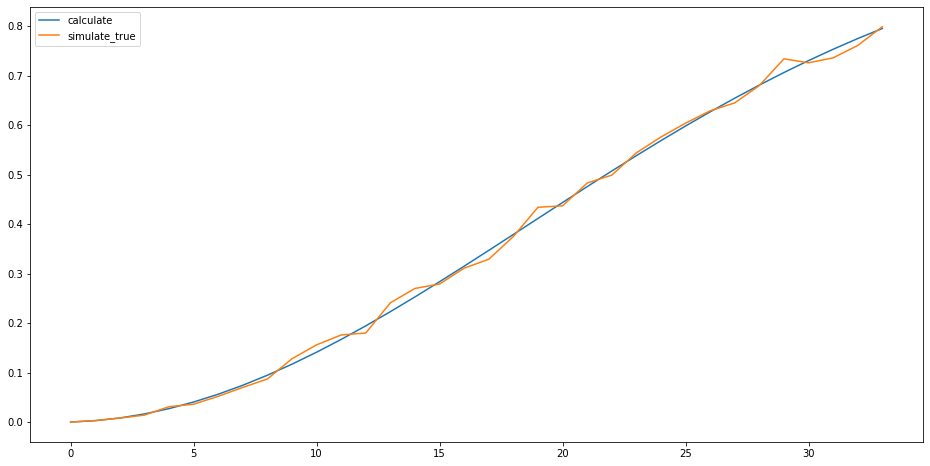

In [153]:
plt.figure(figsize=(16,8))
plt.plot([prob_overlap(room=r) for r in range(1, 35)], label='calculate');
plt.plot([simulate_room_true(dataf=birth_prob_df, room=r) for r in range(1, 35)], label='simulate_true')
plt.legend();